# Project description

As Junior Data Analyst in the analytical department, I have been given the following data:

* Server logs with data on Yandex.Afisha visits from June 2017 through May 2018
* Dump file with all orders for the period
* Marketing expenses statistics

We are going to study:
* How people use the product
* When they start to buy
* How much money each customer brings
* When they pay off

# Table of Contents


1. **Preparing the data for analysis**


2. **Reports and Metrics**
    - **2.1 Product**
        * How many people use it every day, week, and month?
        * How many sessions are there per day? (One user might have more than one session.)
        * What is the length of each session?
        * How often do users come back?
        
    - **2.2 Sales**
        * When do people start buying? 
        * How many orders do they make during a given period of time?
        * What is the average purchase size?
        * How much money do they bring? (LTV)

    - **2.3 Marketing**
        * How much money was spent? Overall/per source/over time
        * How much did customer acquisition from each of the sources cost? 
        * How worthwhile where the investments? (ROI)


3. **Conclusion and Recommendations**
    * What sources/platforms would we recommend? 
    * Metrics we focused on? Why? What conclusions did we draw after finding the metric values?

# Description of the Data

* **The `visits` table (server logs with data on website visits):**
    * `Uid` — user's unique identifier
    * `Device` — user's device
    * `Start Ts` — session start date and time
    * `End Ts` — session end date and time
    * `Source Id` — identifier of the ad source the user came from


* **The `orders` table (data on orders):**
    * `Uid` — unique identifier of the user making an order Buy Ts — order date and time
    * `Revenue` — Yandex.Afisha's revenue from the order


* **The `costs` table (data on marketing expenses):** 
    * `source_id` — ad source identifier
    * `dt` — date
    * `costs` — expenses on this ad source on this day
    

* **Color code for the data:**

    - <span style="color:orange">**Device: Desktop**</span>
    - <span style="color:purple">**Device: Touch**</span>
    - <span style="color:yellowgreen">**Year 2017**</span>
    - <span style="color:lightseagreen">**Year 2017**</span>


---

## **Preparing the data for analysis**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# reading datasets and storing them into variables
try:
    visits = pd.read_csv('datasets/visits_log_us.csv',
                         dtype={'Device': 'category'},
                         parse_dates=['Start Ts', 'End Ts'])
    orders = pd.read_csv('datasets/orders_log_us.csv',
                         parse_dates=['Buy Ts'])
    costs = pd.read_csv('datasets/costs_us.csv',
                         parse_dates=['dt'])
except:
    visits = pd.read_csv('/datasets/visits_log_us.csv',
                         dtype={'Device': 'category'},
                         parse_dates=['Start Ts', 'End Ts'])
    orders = pd.read_csv('/datasets/orders_log_us.csv',
                         parse_dates=['Buy Ts'])
    costs = pd.read_csv('/datasets/costs_us.csv',
                         parse_dates=['dt'])

In [3]:
print("VISITS TABLE:")
visits.info(memory_usage='deep')
print()
print("ORDERS TABLE:")
orders.info(memory_usage='deep')
print()
print("COSTS TABLE:")
costs.info(memory_usage='deep')

VISITS TABLE:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB

ORDERS TABLE:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB

COSTS TABLE:
<class 'pandas.core.frame.

We rename the columns on the three tables to align:

In [4]:
# Renaming columns names:
visits.rename(columns=lambda x: str.lower(x).replace(" ","_"), inplace=True)
orders.rename(columns=lambda x: str.lower(x).replace(" ","_"), inplace=True)
costs.rename(columns=lambda x: str.lower(x).replace(" ","_"), inplace=True)

In [5]:
#Check:
visits.columns

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')

In [6]:
orders.columns

Index(['buy_ts', 'revenue', 'uid'], dtype='object')

In [7]:
costs.columns

Index(['source_id', 'dt', 'costs'], dtype='object')

Check for duplicates:

In [8]:
print("There are", visits.duplicated().sum(),"duplicates in the visits table")
print("There are", costs.duplicated().sum(),"duplicates in the costs table")
print("There are", orders.duplicated().sum(), "duplicates in the orders table")


There are 0 duplicates in the visits table
There are 0 duplicates in the costs table
There are 0 duplicates in the orders table


<span style="color:orange">**Conlcusions:** </span> 

- We downloaded the data and changed the datatypes to the correct ones
- We change column names on each table to match 
- We checked if there are any duplicates on the data and we do not have any 

---

## Reports and Metrics

### Product

* How many people use it every day, week, and month?
* How many sessions are there per day? (One user might have more than one session.)
* What is the length of each session?
* How often do users come back?
 

#### How many people use it every day, week and month?

- DAU: Daily Active Users
- WAU: Weekly Active Users
- MAU: Monthly Active Users

In [9]:
visits['year'] = visits['start_ts'].astype('datetime64[Y]')
visits['week'] = visits.start_ts.astype('datetime64[W]')
visits['month'] = visits.start_ts.astype('datetime64[M]')
visits['day'] = visits.start_ts.astype('datetime64[D]')

In [10]:
# Grouping by periode and aggregating user counts
mau = visits.groupby('month')['uid'].nunique().reset_index()
wau = visits.groupby('week')['uid'].nunique().reset_index()
dau = visits.groupby('day')['uid'].nunique().reset_index()

In [11]:
mau['month'].describe()

count                      12
unique                     12
top       2018-03-01 00:00:00
freq                        1
first     2017-06-01 00:00:00
last      2018-05-01 00:00:00
Name: month, dtype: object

In [12]:
wau['week'].describe()

count                      53
unique                     53
top       2018-05-24 00:00:00
freq                        1
first     2017-06-01 00:00:00
last      2018-05-31 00:00:00
Name: week, dtype: object

In [13]:
dau['day'].describe()

count                     364
unique                    364
top       2017-09-29 00:00:00
freq                        1
first     2017-06-01 00:00:00
last      2018-05-31 00:00:00
Name: day, dtype: object

In [14]:
visits.info(memory_usage='deep')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  category      
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
 5   year       359400 non-null  datetime64[ns]
 6   week       359400 non-null  datetime64[ns]
 7   month      359400 non-null  datetime64[ns]
 8   day        359400 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](6), int64(1), uint64(1)
memory usage: 22.3 MB


Plot histogram to see the amount of visits per month:

- <span style="color:darkcyan">Total MAU Per Month</span>
- <span style="color:red">Mean</span>
- <span style="color:orange">Devide: Desktop</span>
- <span style="color:purple">Devide: Touch</span>




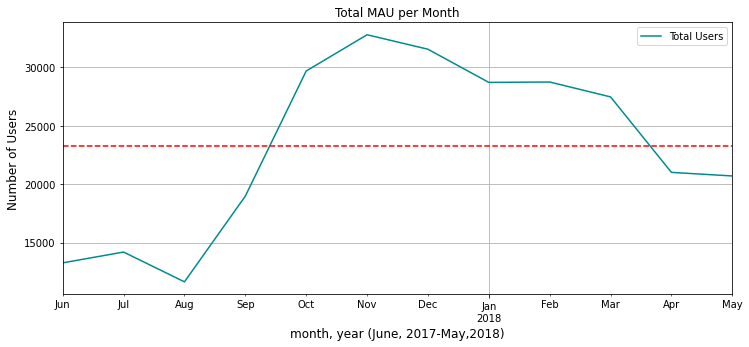

Average of 23228 users used the product per month between June 2017 and May 2018.



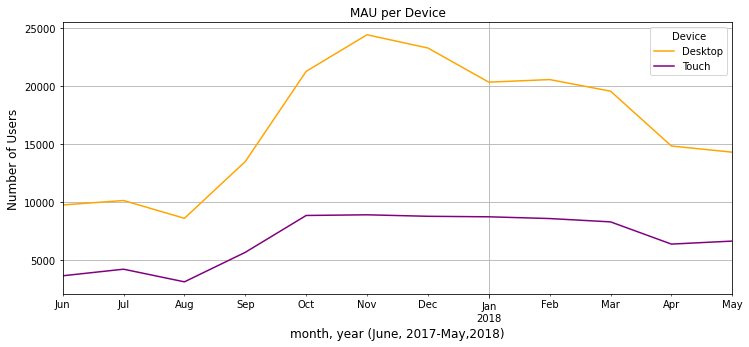

An average of 16724 users used the product on 'desktop', while an average of 6825 users used it from 
'touch'.


In [15]:
mau = visits.groupby(['month']).agg({'uid': 'nunique'}).mean()
visits.groupby(['month']).agg({'uid': 'nunique'}).plot(grid = True, figsize = (12, 5), color='darkcyan')
plt.title('Total MAU per Month', size=12)
plt.ylabel('Number of Users', size=12)
plt.xlabel('month, year (June, 2017-May,2018)', size=12)
plt.legend(['Total Users'], loc='best')
plt.axhline( y=mau['uid'].mean(), ls='--',color="red")
plt.show();

print("Average of {} users used the product per month between June 2017 and May 2018.".format(int(mau)))
print()

visits.pivot_table(index = ['month'], columns = 'device', values = 'uid', aggfunc = 'nunique').plot(grid = True, figsize = (12, 5), color=('orange', 'purple'))
plt.legend([ 'Desktop','Touch'], loc='best', title="Device")
plt.title('MAU per Device', size=12)
plt.ylabel('Number of Users', size=12)
plt.xlabel('month, year (June, 2017-May,2018)', size=12)
plt.show();
t_mau = visits.query('device == "touch"').groupby(['year', 'month']).agg({'uid': 'nunique'}).mean()
d_mau = visits.query('device == "desktop"').groupby(['year', 'month']).agg({'uid': 'nunique'}).mean()

print("""An average of {} users used the product on 'desktop', while an average of {} users used it from 
'touch'.""".format(int(d_mau), int(t_mau)))

<span style="color:orange">**Conlcusions:** </span>

- Active users between June '17 to August '17 is well below average, lowest point in August
- During a year time, average MAU is 23,228. This also corresponds to winter months, where is more likely people will buy tickets for concerts and events, since is cold to do things outside. 
    - The peak is during Nov-Dec, when the holidays time
- We can also see a decrease in the beginning of March to May, where the good weather starts again. 
    - We might needed to check previous years' data to confirm this

- We can see there are more desktop users than touch users, which can leads us to think the product is more accessible on desktop device. We might conclude that touch device experience has to improve to increase the amount of users


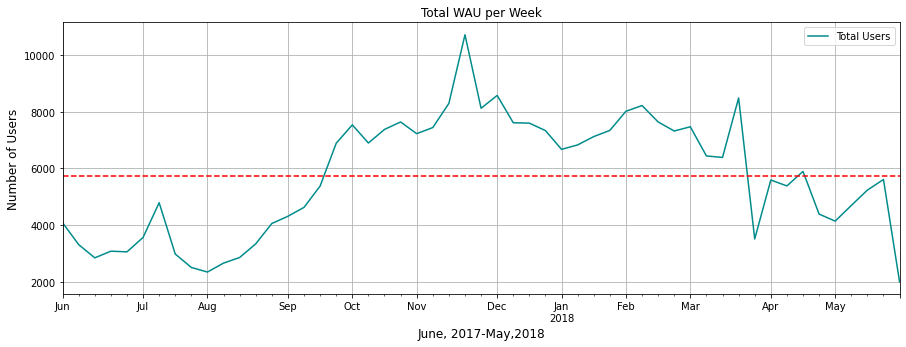

An average of 5724 users used the product per week between June 2017 and May 2018.



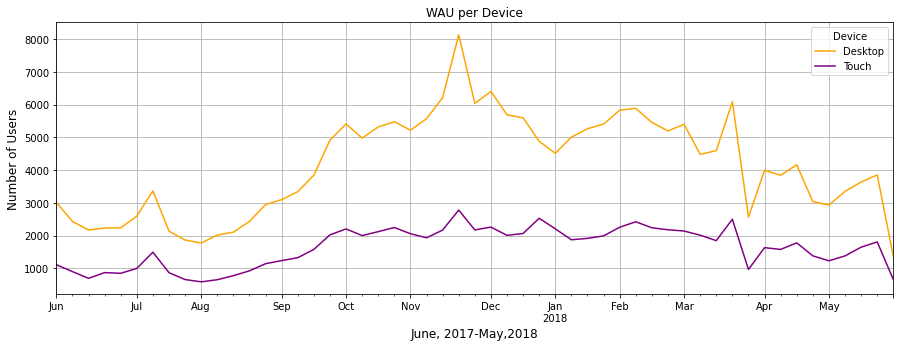

An average of 4061 users used the product on 'desktop', while an average of 1607 users used it from
'touch'.


In [16]:
wau = visits.groupby(['week']).agg({'uid': 'nunique'}).mean()
visits.groupby(['week']).agg({'uid': 'nunique'}).plot(grid = True, figsize = (15, 5), color='darkcyan')
plt.title('Total WAU per Week', size=12)
plt.ylabel('Number of Users', size=12)
plt.xlabel('June, 2017-May,2018', size=12)
plt.legend(['Total Users'], loc='best')
plt.axhline( y=wau['uid'].mean(), ls='--',color="red")
plt.show();
print("An average of {} users used the product per week between June 2017 and May 2018.".format(int(wau)))
print()
visits.pivot_table(index = ['week'], columns = 'device', values = 'uid', aggfunc = 'nunique').plot(grid = True, figsize = (15, 5), color=('orange', 'purple'))
plt.legend([ 'Desktop','Touch'], loc='best', title="Device")
plt.title('WAU per Device', size=12)
plt.ylabel('Number of Users', size=12)
plt.xlabel('June, 2017-May,2018', size=12)
plt.show();
t_wau = visits.query('device == "touch"').groupby(['year', 'week']).agg({'uid': 'nunique'}).mean()
d_wau = visits.query('device == "desktop"').groupby(['year', 'week']).agg({'uid': 'nunique'}).mean()
print("""An average of {} users used the product on 'desktop', while an average of {} users used it from
'touch'.""".format(int(d_wau), int(t_wau)))

<span style="color:orange">**Conlcusions:**</span>

- The WAU trends are similar than the monthly ones, again with a peak on the Holiday season, starting end of November (which can align with the Black Friday)

- Desktop and Touch usage is pretty similar and aligned, just on touch devices with a much lowe volume of users


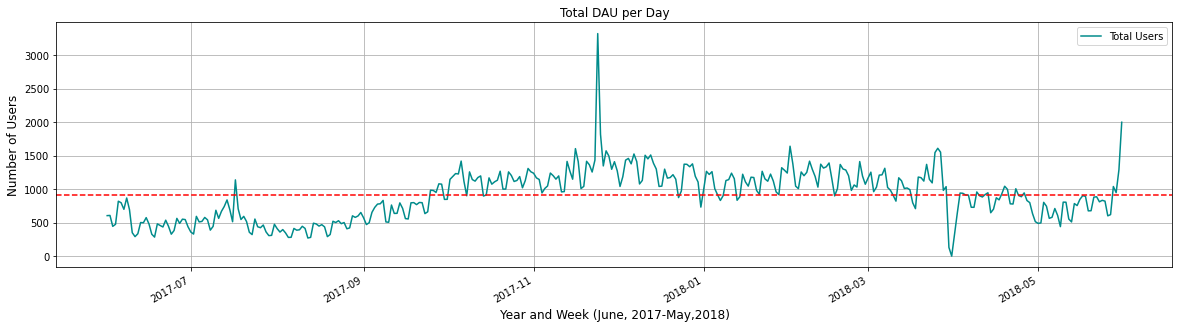

An average of 907 users used the product per day between June 2017 and May 2018.



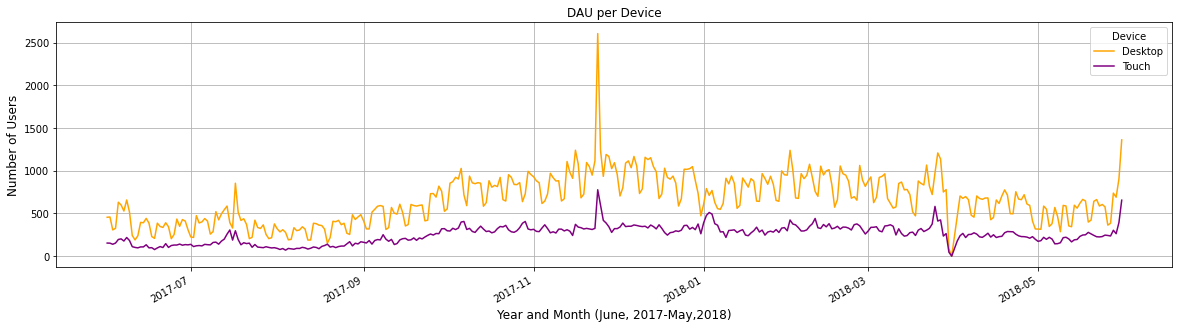

An average of 659 users used the product on 'desktop', while an average of 252 users used it from
'touch'.


In [17]:
dau = visits.groupby(['day']).agg({'uid': 'nunique'}).mean()
visits.groupby(['day']).agg({'uid': 'nunique'}).plot(grid = True, figsize = (20, 5), color='darkcyan')
plt.title('Total DAU per Day', size=12)
plt.ylabel('Number of Users', size=12)
plt.xlabel('Year and Week (June, 2017-May,2018)', size=12)
plt.legend(['Total Users'], loc='best')
plt.axhline( y=dau['uid'].mean(), ls='--',color="red")
plt.show();

print("An average of {} users used the product per day between June 2017 and May 2018.".format(int(dau)))
print()
visits.pivot_table(index = ['day'], columns = 'device', values = 'uid', aggfunc = 'nunique').plot(grid = True, figsize = (20, 5), color=('orange', 'purple'))
plt.legend([ 'Desktop','Touch'], loc='best', title="Device")
plt.title('DAU per Device', size=12)
plt.ylabel('Number of Users', size=12)
plt.xlabel('Year and Month (June, 2017-May,2018)', size=12)
plt.show();
t_dau = visits.query('device == "touch"').groupby(['day']).agg({'uid': 'nunique'}).mean()
d_dau = visits.query('device == "desktop"').groupby(['day']).agg({'uid': 'nunique'}).mean()
print("""An average of {} users used the product on 'desktop', while an average of {} users used it from
'touch'.""".format(int(d_dau), int(t_dau)))


<span style="color:orange">**Conlcusions:**</span>

- When we zoom into daily usage, we see almost the same trends, noticing a big peak in the end of November that, again, we think might be related to Black Friday

- We can see drops on desktop users very constistenly across the timeframe. Those drops can align with using the product from desktop only on weekdays and we see those consistent and patterned drops. While on touch devices, the usage is more consistent across days 


Calculating the **sticky factor**. This metric tells us how loyal the audience is — how often they return to the app. The formula is simple: `sticky factor = DAU/WAU` or `sticky factor = DAU/MAU`.

In [18]:
print("""The Sticky Factor, used to evaluate how stable the user base is and how regularly they visit the app, 
is {:.2f}% for DAU/MonthAU and {:.2f}% for DAU/WeekAU.""".format(float(dau/mau*100), float(dau/wau*100)))

The Sticky Factor, used to evaluate how stable the user base is and how regularly they visit the app, 
is 3.91% for DAU/MonthAU and 15.86% for DAU/WeekAU.


#### How many sessions are there per day? (One user might have more than one session.)


In [19]:
daily_sessions = visits.groupby('day').agg({'uid':'count'})
touch_daily = visits.query('device == "touch"').groupby('day').agg({'uid':'count'})
desktop_daily = visits.query('device == "desktop"').groupby('day').agg({'uid':'count'})

In [20]:
touch_daily = touch_daily.merge(desktop_daily, on='day')
daily_sessions = daily_sessions.merge(touch_daily, on='day')

In [21]:
daily_sessions.rename(columns = {'uid':'total_sessions', 'uid_x':'touch_sessions', 'uid_y':'desktop_sessions'}, inplace = True)
daily_sessions.head()

,total_sessions,touch_sessions,desktop_sessions
day,,,
2017-06-01,664,163,501
2017-06-02,658,160,498
2017-06-03,477,148,329
2017-06-04,510,161,349
2017-06-05,893,200,693


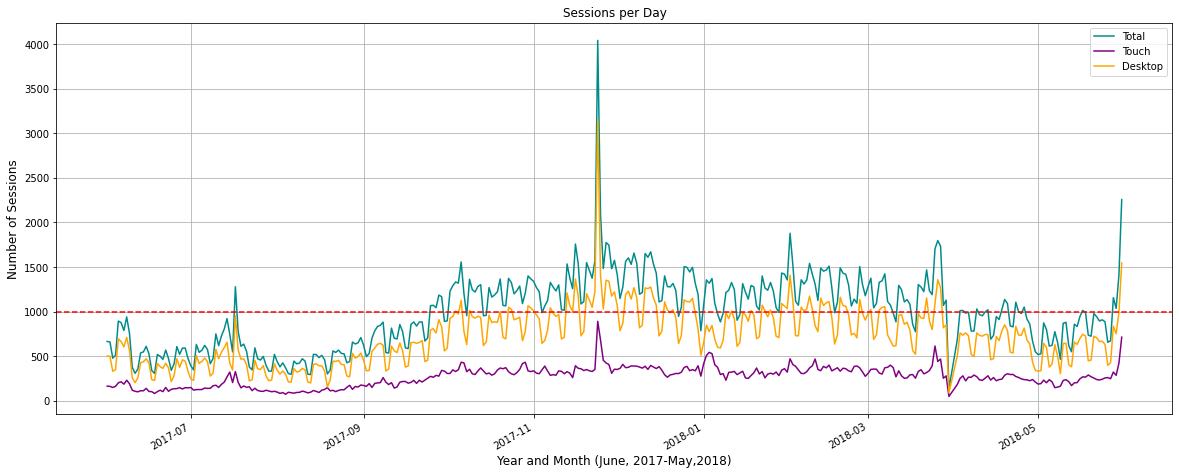

The average number of daily sessions between June 2017 and May 2018 was: 990. 
The average number of daily sessions on on 'desktop' was: 723
The average number of daily sessions on 'touch' devices was: 266. 



In [22]:
daily_sessions.plot(grid = True, figsize = (20, 8), color=('darkcyan', 'purple', 'orange'))
plt.legend([ 'Total', 'Touch', 'Desktop'], loc='best')
plt.title('Sessions per Day', size=12)
plt.ylabel('Number of Sessions', size=12)
plt.xlabel('Year and Month (June, 2017-May,2018)', size =12)
plt.axhline( y=daily_sessions['total_sessions'].mean(), ls='--',color="red")
plt.show();

print("""The average number of daily sessions between June 2017 and May 2018 was: {}. 
The average number of daily sessions on on 'desktop' was: {}
The average number of daily sessions on 'touch' devices was: {}. 
""".format(int(daily_sessions['total_sessions'].mean()), int(daily_sessions['desktop_sessions'].mean()), int(daily_sessions['touch_sessions'].mean())))


<span style="color:orange">**Conlcusions:**</span>

- We can see a difference on the overall number, special on Holiday season, where the sessions per day have a big peak


#### What is the length of each session?


In [23]:
visits['session_duration'] = (visits['end_ts'] - visits['start_ts']).dt.seconds


We created a new column with the session duration time in seconds:

In [24]:
visits[['start_ts', 'end_ts', 'session_duration']].head()


,start_ts,end_ts,session_duration
0,2017-12-20 17:20:00,2017-12-20 17:38:00,1080
1,2018-02-19 16:53:00,2018-02-19 17:21:00,1680
2,2017-07-01 01:54:00,2017-07-01 01:54:00,0
3,2018-05-20 10:59:00,2018-05-20 11:23:00,1440
4,2017-12-27 14:06:00,2017-12-27 14:06:00,0


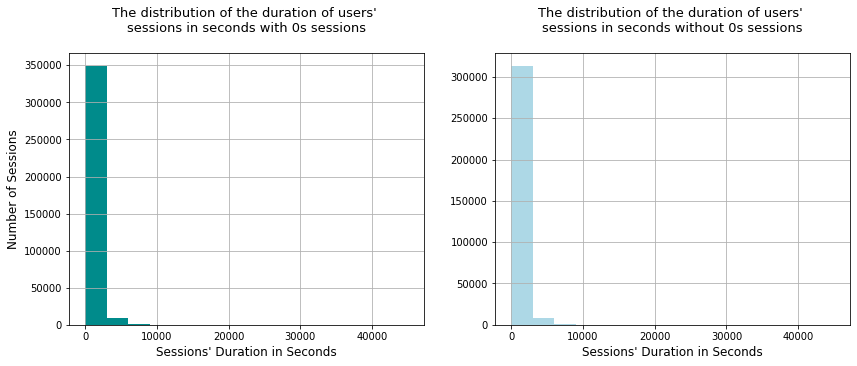

In [25]:
no_0_sessions = visits.query('session_duration > 0')['session_duration']
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

plot_range = (0, 45000)

# first plot: the histogram:
axs[0].hist(x = visits['session_duration'], range = plot_range,bins = 15, color='darkcyan')
axs[0].grid()
# the title:
axs[0].set_title("The distribution of the duration of users' \nsessions in seconds with 0s sessions\n", size=13)
# axis labels:
axs[0].set_xlabel("Sessions' Duration in Seconds", size=12)
axs[0].set_ylabel('Number of Sessions', size=12)


# second plot: the histogram:
axs[1].hist(x = no_0_sessions, range = plot_range,bins = 15, color='lightblue')
axs[1].grid()
# the title:
axs[1].set_title("The distribution of the duration of users' \nsessions in seconds without 0s sessions\n", size=13)
# axis labels:
axs[1].set_xlabel("Sessions' Duration in Seconds", size=12)
#axs[1].set_ylabel('Amount of Sessions', size=12)
plt.show()

In [26]:
print("Total stats; duration of the users' sessions:")
display(visits['session_duration'].describe())
print("Higher than 0 seconds; users sessions stats:")
display(no_0_sessions.describe())
print()
print("""Average Session Length (the ASL) is {} seconds per visit. 

NOTE: due to the distribution of the users' sessions length, average was calculated using 'mode'.
""".format(int(visits['session_duration'].mode())))

Total stats; duration of the users' sessions:


count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: session_duration, dtype: float64

Higher than 0 seconds; users sessions stats:


count    323606.000000
mean        714.684623
std        1047.052806
min          19.000000
25%         120.000000
50%         360.000000
75%         900.000000
max       84480.000000
Name: session_duration, dtype: float64


Average Session Length (the ASL) is 60 seconds per visit. 

NOTE: due to the distribution of the users' sessions length, average was calculated using 'mode'.



<span style="color:orange">**Conlcusions:** </span> 

- Overall of sessions do not exceed 15min (840-900s) -- 75% of sessions
- Longest session is way too long: 711s = 11 min


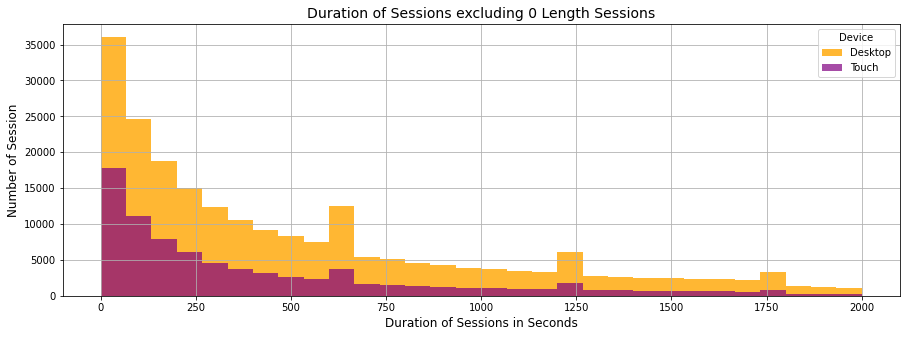

In [27]:
visits_with_duration = visits[visits['session_duration'] > 0]
touch_visits = visits_with_duration[visits_with_duration['device'] == 'touch']
desktop_visits = visits_with_duration[visits_with_duration['device'] == 'desktop']


plt.title('Duration of Sessions excluding 0 Length Sessions',fontsize=14)
desktop_visits['session_duration'].hist(range=(0,2000), bins=30, alpha=0.8, color = "orange", figsize=(15, 5))
touch_visits['session_duration'].hist(range=(0,2000), bins=30, alpha=0.7, color = "purple", figsize=(15, 5))
plt.legend([ 'Desktop','Touch'], loc='best', title="Device")
plt.xlabel("Duration of Sessions in Seconds",size=12)
plt.ylabel("Number of Session",size=12)
plt.show()

In [28]:
print("Total stats; duration of the users' sessions (exclude 0s):")
display(visits_with_duration.groupby(['device'])['session_duration'].agg(['count', 'mean', 'std', 'var']))
print()
print("""The ASL for sessions on 'touch' devices is {}s per visit, 
The ALS for sessions on and for 'desktop' is {}s. 
Both type of devices have the same average time per visit.

NOTE: due to the distribution of the users' sessions length, the average was calculated using 'mode'.
""".format(int(touch_visits['session_duration'].mode()), int(desktop_visits['session_duration'].mode())))


Total stats; duration of the users' sessions (exclude 0s):


,count,mean,std,var
device,,,,
desktop,238878,773.755834,1120.541232,1.255613e+06
touch,84728,548.142125,780.801668,6.096512e+05



The ASL for sessions on 'touch' devices is 60s per visit, 
The ALS for sessions on and for 'desktop' is 60s. 
Both type of devices have the same average time per visit.

NOTE: due to the distribution of the users' sessions length, the average was calculated using 'mode'.



<span style="color:orange">**Conlcusions:** </span> 

- The distribution on sessions duration is pretty similar in both devices. The main difference we find it in the number of sessions. 
- Most of sessionsa are no longer than 240s (4minutes)

#### How often do users come back? -- Retention Rate

In [29]:
# firs session per user:
first_session_visits = visits.groupby('uid')['day'].min().reset_index()
first_session_visits.columns = ['uid','first_session']
first_session_visits.head()

,uid,first_session
0,11863502262781,2018-03-01
1,49537067089222,2018-02-06
2,297729379853735,2017-06-07
3,313578113262317,2017-09-18
4,325320750514679,2017-09-30


In [30]:
# Merge on `visit` table
visits = visits.merge(first_session_visits, on='uid', how='inner')
visits.head()

,device,end_ts,source_id,start_ts,uid,year,week,month,day,session_duration,first_session
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-14,2017-12-01,2017-12-20,1080,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-15,2018-02-01,2018-02-19,1680,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-01-01,2017-06-29,2017-07-01,2017-07-01,0,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-01-01,2018-05-17,2018-05-01,2018-05-20,1440,2018-03-09
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-01-01,2018-03-08,2018-03-01,2018-03-09,1680,2018-03-09


In [31]:
# Cohort analysis - monthly user
visits['month'] = visits['day'].astype('datetime64[M]')
visits['first_session_month'] = visits['first_session'].astype('datetime64[M]')

# Calculate the age of the cohorts
visits['age'] = ((pd.to_datetime(visits['month']) - pd.to_datetime(visits['first_session_month'])) / np.timedelta64(1,'M')).round().astype('int')

# Create a pivot table with the retention rate:
cohorts = visits.pivot_table(index='first_session_month',columns='age', values='uid', aggfunc='nunique')
cohorts.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_session_month,,,,,,,,,,,,
2017-06-01,13259.0,1043.0,713.0,814.0,909.0,947.0,809.0,766.0,694.0,674.0,539.0,596.0
2017-07-01,13140.0,737.0,674.0,738.0,765.0,633.0,596.0,601.0,510.0,376.0,361.0,
2017-08-01,10181.0,783.0,640.0,639.0,510.0,448.0,370.0,402.0,284.0,265.0,,
2017-09-01,16704.0,1428.0,1156.0,847.0,658.0,632.0,599.0,404.0,381.0,,,
2017-10-01,25977.0,2042.0,1357.0,1012.0,890.0,837.0,555.0,529.0,,,,
2017-11-01,27248.0,2133.0,1202.0,1054.0,919.0,638.0,594.0,,,,,
2017-12-01,25268.0,1410.0,960.0,786.0,512.0,481.0,,,,,,
2018-01-01,22624.0,1351.0,890.0,565.0,458.0,,,,,,,
2018-02-01,22197.0,1267.0,565.0,446.0,,,,,,,,



**Calculating retention name:**

Divided number of users from the cohort that visited on each month by the cohort size. Saved results in `retention`




In [32]:
# Calculating the retention rate:
retention = cohorts.iloc[:,0:].div(cohorts[0], axis=0)
retention.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_session_month,,,,,,,,,,,,
2017-06-01,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07-01,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,
2017-08-01,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,,
2017-09-01,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.03586,0.024186,0.022809,,,
2017-10-01,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,,,,
2017-11-01,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.0218,,,,,
2017-12-01,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,,,,,,
2018-01-01,1.0,0.059715,0.039339,0.024973,0.020244,,,,,,,
2018-02-01,1.0,0.05708,0.025454,0.020093,,,,,,,,


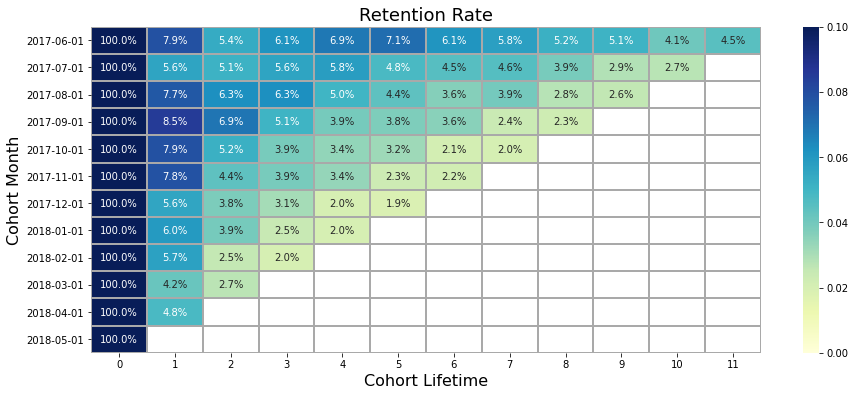

In [33]:
# Creating a heatmap:
retention.index = retention.index.astype(str)
plt.figure(figsize=(15,6))
plt.title('Retention Rate', size=18)
sns.heatmap(retention, annot=True, fmt='.1%', linewidths=1, linecolor='darkgray',cmap="YlGnBu", vmin=0, vmax=0.1)
plt.xlabel("Cohort Lifetime", size=16) 
plt.ylabel("Cohort Month", size=16) 
plt.show()



<span style="color:orange">**Conlcusions:** </span> 

- Retention rate from summer to the Holiday season is higher (specially for the first cohort: June '17) than the first two Q of the year. 
- Retention rate after the holidays (beginning in January 2018), is low.
- Retention drops after initial cohort month (0) 


<h4 style="color:purple">Summary conclusions on usage, duration and retention:** </h4> 


**Usage**

* ***Montly usage:***

    - Active users between June '17 to August '17 is well below average, lowest point in August
    - During a year time, average MAU is 23,228. This also corresponds to winter months, where is more likely people will buy tickets for concerts and events, since is cold to do things outside. 
        - The peak is during Nov-Dec, when the holidays time
    - We can also see a decrease in the beginning of March to May, where the good weather starts again. 
        - We might needed to check previous years' data to confirm this
    - We can see there are more desktop users than touch users, which can leads us to think the product is more accessible on desktop device. We might conclude that touch device experience has to improve to increase the amount of users


* ***Weekly usage:***
    - The WAU trends are similar than the monthly ones, again with a peak on the Holiday season, starting end of November (which can align with the Black Friday)

    - Desktop and Touch usage is pretty similar and aligned, just on touch devices with a much lowe volume of users

* ***Daily usage:***

    - When we zoom into daily usage, we see almost the same trends, noticing a big peak in the end of November that, again, we think might be related to Black Friday

    - We can see drops on desktop users very constistenly across the timeframe. Those drops can align with using the product from desktop only on weekdays and we see those consistent and patterned drops. While on touch devices, the usage is more consistent across days 


**Sessions duration**

 
- Overall of sessions do not exceed 15min (840-900s) -- 75% of sessions
- Longest session is way too long: 711s = 11 min, probably something abnormal 
- The amount of zero seconds session is a fraction of the total number of sessions (35,794).
- ASL for both desktop and touch devices is 60 seconds (1 minute).
- The distribution on sessions duration is pretty similar in both devices. The main difference we find it in the number of sessions. 
- Most of sessionsa are no longer than 240s (4minutes)

**Retention rates**

- Retention rate from summer to the Holiday season is higher (specially for the first cohort: June '17) than the first two Q of the year. 
- Retention rate after the holidays (beginning in January 2018), is low.
- Retention drops after initial cohort month (0) 



### Sales

In this section we analyze the users' orders using the product. We want to understand when the user turn to costumers. 
Conversion rate, amount of orders the customers made over time and lifetime value.


**We will answer the following questions:** 
* When do people start buying?
* How many orders do they make during a given period of time?
* What is the average purchase size?
* How much money do they bring? (LTV)


#### When do people start buying? - From user to paying costumer

Below we create two tables and merge them into one that we will call `first_visit_order`:
1. Users' first purchase
2. Users' first visit


In [34]:
first_order = orders.groupby(['uid']).agg({'buy_ts': 'min'}).reset_index()
first_visit = visits.groupby(['uid']).agg({'start_ts': 'min'}).reset_index()


In [35]:
first_visit_order = first_visit.merge(first_order, on='uid')
first_visit_order.columns = ['uid', 'first_visit_month', 'first_order_month']
first_visit_order

,uid,first_visit_month,first_order_month
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00
3,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00
...,...,...,...
36518,18445147675727495770,2017-08-20 13:30:00,2017-11-24 09:03:00
36519,18445407535914413204,2017-09-22 23:48:00,2017-09-22 23:55:00
36520,18445601152732270159,2017-08-07 11:51:00,2018-03-26 22:54:00
36521,18446156210226471712,2017-11-07 10:01:00,2018-02-18 19:34:00


In [36]:
first_visit_order['first_visit_month'] = first_visit_order['first_visit_month'].astype('datetime64[M]') 
first_visit_order['first_order_month'] = first_visit_order['first_order_month'].astype('datetime64[M]')
first_visit_order['days_to_conversion'] = first_visit_order['first_order_month']-first_visit_order['first_visit_month']
first_visit_order['conversion']=(first_visit_order['days_to_conversion']/np.timedelta64(1,'D')).astype('int')


In [37]:
first_visit_order


,uid,first_visit_month,first_order_month,days_to_conversion,conversion
0,313578113262317,2017-09-01,2018-01-01,122 days,122
1,1575281904278712,2017-06-01,2017-06-01,0 days,0
2,2429014661409475,2017-10-01,2017-10-01,0 days,0
3,2464366381792757,2018-01-01,2018-01-01,0 days,0
4,2551852515556206,2017-11-01,2017-11-01,0 days,0
...,...,...,...,...,...
36518,18445147675727495770,2017-08-01,2017-11-01,92 days,92
36519,18445407535914413204,2017-09-01,2017-09-01,0 days,0
36520,18445601152732270159,2017-08-01,2018-03-01,212 days,212
36521,18446156210226471712,2017-11-01,2018-02-01,92 days,92


<span style="color:green">**Notes:** </span> 

We substracted the first visit (month) to the first order (month) to get the `days_to_conversion` and then calculate the conversion in days. This way we can group users by days to conversion.

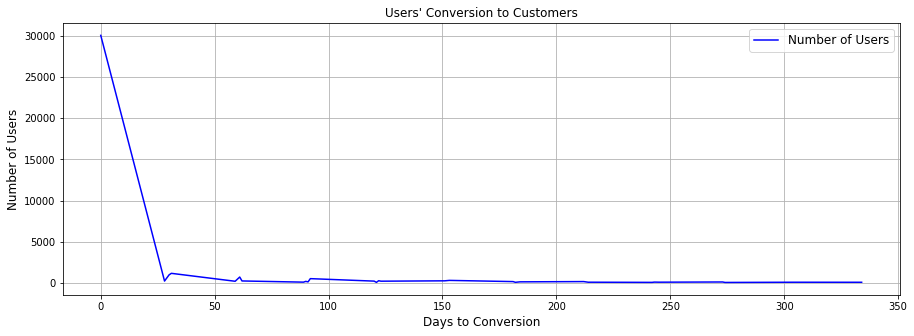

In [38]:
conversion = first_visit_order.groupby('conversion').agg({'uid':'count'}).sort_values(by="conversion")

conversion.plot(grid = True, figsize = (15, 5), color='blue')
plt.title("Users' Conversion to Customers", size=12)
plt.ylabel('Number of Users', size=12)
plt.xlabel('Days to Conversion', size=12)
plt.legend(['Number of Users'], loc='best', fontsize=12)
plt.show();


In [39]:
print("""Total visits: {}
Orders placed by those visits: {} 

Conversion rate is {:.2%}. 
From 30,087 orders, {:.2%}, were placed in the users' first visit.

The average time it takes a user to become a customer is {:.1f} days.""".format(visits['uid'].nunique(), orders['uid'].nunique(), (orders['uid'].nunique()/visits['uid'].nunique()), (30087/orders['uid'].nunique()), first_visit_order['conversion'].mean()))


Total visits: 228169
Orders placed by those visits: 36523 

Conversion rate is 16.01%. 
From 30,087 orders, 82.38%, were placed in the users' first visit.

The average time it takes a user to become a customer is 16.6 days.


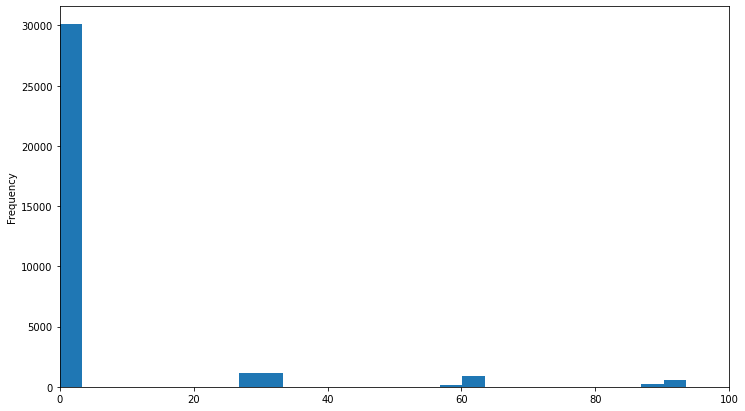

In [40]:
(first_visit_order['conversion'].plot(kind='hist',bins=100, figsize=(12,7)))
plt.xlim(0,100)
plt.show()

#### How many orders do they make during a given period of time?

We added 4 new columns in the `orders` table and merge them to the `orders`df:
- `order_year`
- `order_month`
- `order_week`
- `order_day`


We created `first_order_month` column and `cohort_lifetime`. With the different between them, we can calculate the order month and the month of the first order


In [41]:
orders['order_year'] = orders['buy_ts'].astype('datetime64[Y]')
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]') 
orders['order_week'] = orders['buy_ts'].astype('datetime64[W]')
orders['order_date'] = orders['buy_ts'].astype('datetime64[D]')
first_order.columns = ['uid', 'first_order']
orders = orders.merge(first_order,on='uid') 

In [42]:
orders['first_order_month'] = orders['first_order'].astype('datetime64[M]')
orders['cohort_lifetime'] = ((orders['order_month'] - orders['first_order_month'])/ np.timedelta64(1, 'M')).round().astype(int)

In [43]:
cohorts_orders = (orders.groupby(['first_order_month', 'cohort_lifetime']).agg({'uid': 'nunique', 'order_month':'count'}).reset_index()) 
initial_count_orders = cohorts_orders[cohorts_orders['cohort_lifetime'] == 0][['first_order_month', 'uid']]
initial_count_orders = initial_count_orders.rename(columns={'uid': 'co_uid'})

Grouped `first_order_month` and `cohort_lifetime` and counted the unique number of users and orders placed. Saved results in `cohort_orders` df

A second table was created with only the 0 cohort


In [44]:
cohorts_orders = cohorts_orders.merge(initial_count_orders, on='first_order_month')
cohorts_orders = cohorts_orders.rename(columns={'order_month': 'n_orders'})
cohorts_orders['orders_per_user'] = (cohorts_orders['n_orders']/cohorts_orders['co_uid'])
cohorts_orders.head()

,first_order_month,cohort_lifetime,uid,n_orders,co_uid,orders_per_user
0,2017-06-01,0,2023,2354,2023,1.163618
1,2017-06-01,1,61,177,2023,0.087494
2,2017-06-01,2,50,174,2023,0.086011
3,2017-06-01,3,54,226,2023,0.111715
4,2017-06-01,4,88,292,2023,0.144340


Merged `cohorts` with `initial_count_orders` and rename `order_month` so we can see the number of orders placed on each month and then divide the orders by cohort size. 

Saved results in `orders_per_user`

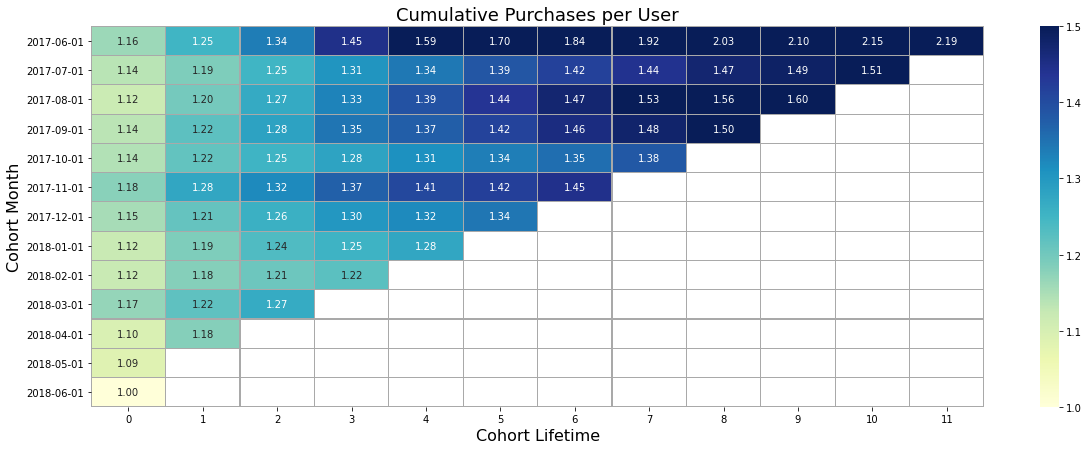



Average daily numbers: 127 users and and 138 orders. 
Average weekly numbers: 818 users and and 951 orders. 
Average monthly numbers: 3155 users and and 3878 orders.


In [45]:
cohorts_orders_pivot = cohorts_orders.pivot_table(index='first_order_month', columns='cohort_lifetime', 
                                        values='orders_per_user', aggfunc='sum').cumsum(axis=1)

cohorts_orders_pivot.index = cohorts_orders_pivot.index.astype(str)
plt.figure(figsize=(20, 7))
plt.title('Cumulative Purchases per User', size=18)
sns.heatmap(cohorts_orders_pivot,annot=True,fmt='.2f',linewidths=.1,linecolor='darkgray',cmap="YlGnBu", vmin=1, vmax=1.5)

plt.xlabel("Cohort Lifetime", size=16) 
plt.ylabel("Cohort Month", size=16) 
plt.show()

print()
import warnings
warnings.filterwarnings('ignore')
week = orders.groupby('order_week')['uid'].count().reset_index()
week_u = orders.groupby('order_week')['uid'].nunique().reset_index().mean()

print()

print("""Average daily numbers: {} users and and {} orders. 
Average weekly numbers: {} users and and {} orders. 
Average monthly numbers: {} users and and {} orders."""
      .format(int(orders.groupby('order_date')['uid'].nunique().reset_index().mean()), int(orders.groupby('order_date')['uid'].count().reset_index().mean())
, int(week_u['uid'].mean()), int(week['uid'].mean()), int(orders.groupby('order_month')['uid'].nunique().reset_index().mean())
, int(orders.groupby('order_month')['uid'].count().reset_index().mean())))

<span style="color:orange">**Conlcusions:** </span> 

On the table above we can see the acumulative purchases per costumer on each cohort. 
Customers in June '17 had the most acumulative number of orders by costumer
Cohort of March '18 is when the orders decreased (after that peak on Holiday season we saw from before)



#### What is the average purchase size?

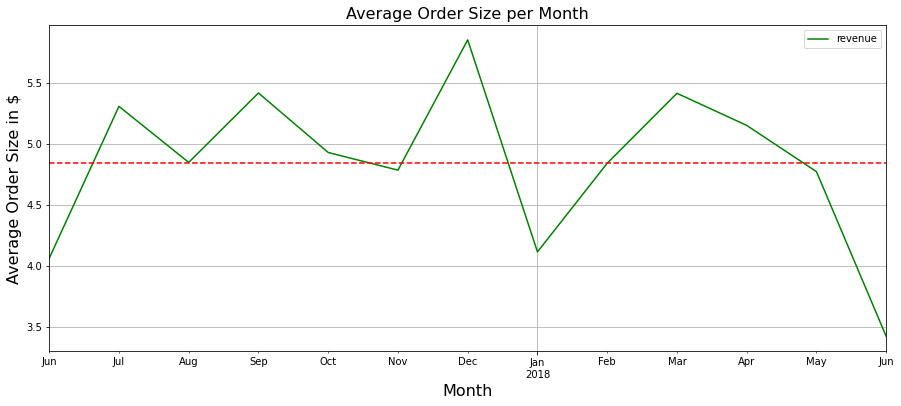

In [46]:
avg_orders_month = orders.pivot_table(index='order_month', values='revenue', 
                                        aggfunc='mean')
avg_orders_month.plot(grid = True, figsize = (15, 6), color='green')
plt.title("Average Order Size per Month", size=16)
plt.ylabel('Average Order Size in $', size=16)
plt.xlabel('Month', size=16)
plt.axhline( y=avg_orders_month['revenue'].mean(), ls='--',color="red")
plt.show();

<span style="color:orange">**Conlcusions:** </span> 

- December is clearly a winner on highests average order size, which makes sense as is holiday season
- September, July and March are also pretty high in size, above the average 
- January drops drastically, we can think is because people invested a lot of money on previous months for the holiday season and now is time to recover financially 


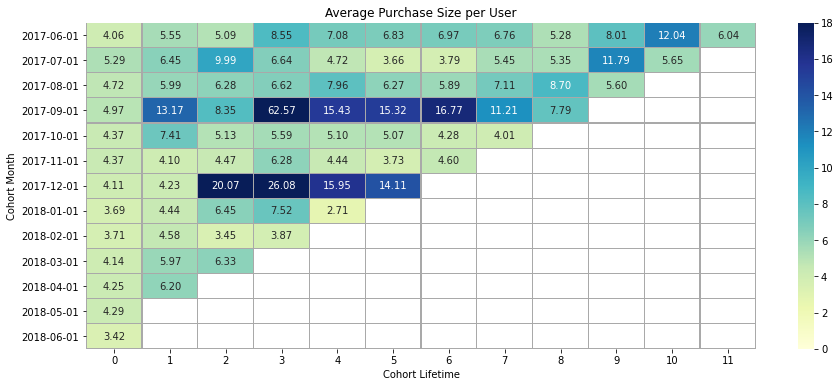

In [47]:
cohorts_revenue = (orders.groupby(['first_order_month', 'cohort_lifetime']).agg({'revenue': 'mean'}).reset_index()) 

cohorts_revenue_pivot = cohorts_revenue.pivot_table(index='first_order_month', columns='cohort_lifetime', values='revenue', 
                                        aggfunc='mean')
cohorts_revenue_pivot.index = cohorts_revenue_pivot.index.astype(str)
plt.figure(figsize=(15, 6))
plt.title('Average Purchase Size per User')
sns.heatmap(cohorts_revenue_pivot,annot=True,fmt='.2f',linewidths=.1,linecolor='darkgray',cmap="YlGnBu", vmin=0, vmax=18)
plt.xlabel("Cohort Lifetime") 
plt.ylabel("Cohort Month") 
plt.show()


<span style="color:orange">**Conlcusions:** </span> 

- The average order size is similar across cohorts, but some had higher than average order sizes: 

- Lifetimes 9 and 10 (March-April '17) of the June 2017 cohort.
- Lifetimes 2 and 9 (September and April '17) of the July 2017 cohort.

- Overall, it seems that the September 2017 and December 2017 cohorts had the highest average order sizes of all cohorts.

#### How much money do they bring? (LTV)

- LTV is the total amount of money a customer brings to the company on average by making purchases.

In [48]:
#table with the size of each cohort:
cohort_size = orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_size.columns = ['first_order_month', 'n_buyers']
cohort_size.head() 

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [49]:
# New table grouped by `first_order_month` and `order_month` + revenue per order:
cohort_ltv = orders.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()
cohort_ltv.columns = ['first_order_month', 'order_month', 'revenue']


# merged the `cohort_size` and `cohort_ltv` tables:
cohort_ltv = cohort_ltv.merge(cohort_size, on='first_order_month')
cohort_ltv

,first_order_month,order_month,revenue,n_buyers
0,2017-06-01,2017-06-01,9557.49,2023
1,2017-06-01,2017-07-01,981.82,2023
2,2017-06-01,2017-08-01,885.34,2023
3,2017-06-01,2017-09-01,1931.30,2023
4,2017-06-01,2017-10-01,2068.58,2023
...,...,...,...,...
74,2018-03-01,2018-05-01,1114.87,3533
75,2018-04-01,2018-04-01,10600.69,2276
76,2018-04-01,2018-05-01,1209.92,2276
77,2018-05-01,2018-05-01,13925.76,2988


In [50]:
# add column with cohort lifetime
cohort_ltv['cohort_lifetime'] = ((cohort_ltv['order_month'] - cohort_ltv['first_order_month']) / np.timedelta64(1, 'M')).round().astype('int')

# add LTV column:
cohort_ltv['ltv'] = cohort_ltv['revenue'] / cohort_ltv['n_buyers']
cohort_ltv.head()


,first_order_month,order_month,revenue,n_buyers,cohort_lifetime,ltv
0,2017-06-01,2017-06-01,9557.49,2023,0,4.724414
1,2017-06-01,2017-07-01,981.82,2023,1,0.485329
2,2017-06-01,2017-08-01,885.34,2023,2,0.437637
3,2017-06-01,2017-09-01,1931.30,2023,3,0.954671
4,2017-06-01,2017-10-01,2068.58,2023,4,1.022531


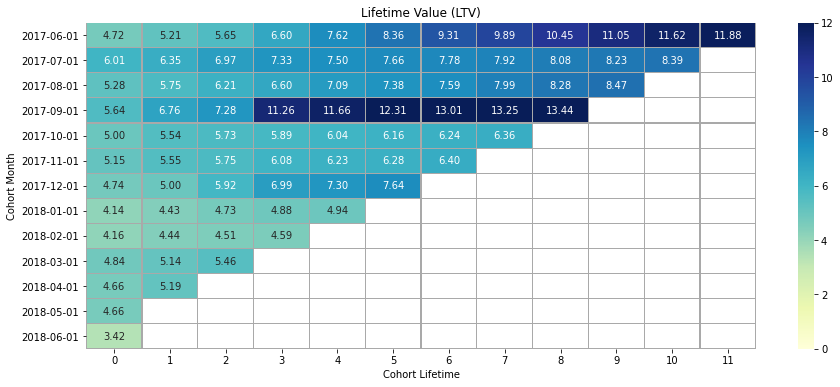

Total LTV per Cohort:first_order_month
2017-06-01    102.36
2017-07-01     82.22
2017-08-01     70.64
2017-09-01     94.61
2017-10-01     46.96
2017-11-01     41.44
2017-12-01     37.59
2018-01-01     23.12
2018-02-01     17.70
2018-03-01     15.44
2018-04-01      9.85
2018-05-01      4.66
2018-06-01      3.42
dtype: float64




In [51]:
cohort_ltv_pivot = cohort_ltv.pivot_table(index='first_order_month', columns='cohort_lifetime', values='ltv', aggfunc='mean').cumsum(axis=1).round(2)

cohort_ltv_pivot.index = cohort_ltv_pivot.index.astype(str)
plt.figure(figsize=(15, 6))
plt.title('Lifetime Value (LTV)')
sns.heatmap(cohort_ltv_pivot,annot=True,fmt='.2f',linewidths=.1,linecolor='darkgray',cmap="YlGnBu", vmin=0, vmax=12)
plt.xlabel("Cohort Lifetime") 
plt.ylabel("Cohort Month") 
plt.show()

print("""Total LTV per Cohort:{}

""".format(cohort_ltv_pivot.sum(axis=1).round(2)))

<span style="color:orange">**Conlcusions:** </span> 

- LTV is higher in the first month
- LTV declined on cohort June '17
- September 2017 cohort's LTV was high on the second month in October. Then dropped and then went up again in December (when we see the highest average purchase size per user). They brought the highest revenue on average
- February '18 cohort had the lowest LTV


<h4 style="color:purple">Summary conclusions on conversion rate, size orders & LTV: </h4> 


**Conversion rate**
- Total visits: 228169
- Orders placed by those visits: 36523 

- Conversion rate is 16.01%. 
- From 30,087 orders, 82.38%, were placed in the users' first visit.
- The average time it takes a user to become a customer is 16.6 days.

**Size Orders**

- The average order size is similar across cohorts, but some had higher than average order sizes: 

    - Lifetimes 9 and 10 (March-April '17) of the June 2017 cohort.
    - Lifetimes 2 and 9 (September and April '17) of the July 2017 cohort.
    
    - Overall, it seems that the September 2017 and December 2017 cohorts had the highest average order sizes of all cohorts.

**LTV**
- LTV is higher in the first month
- LTV declined on cohort June '17
- September 2017 cohort's LTV was high on the second month in October. Then dropped and then went up again in December (when we see the highest average purchase size per user). They brought the highest revenue on average
- February '18 cohort had the lowest LTV


### Marketing

* How much money was spent? Overall/per source/over time
* How much did customer acquisition from each of the sources cost? 
* How worthwhile where the investments? (ROI)

#### How much money was spent? Overall/per source/over time


In [52]:
# Calculating overall marketing cost:
print('Overall marketing cost is {}'.format(costs.costs.sum()))

Overall marketing cost is 329131.62


In [53]:
# Cost per source
cost_per_source = costs.groupby('source_id').costs.sum().reset_index()
cost_per_source

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


In [54]:
costs['dt_year'] = costs['dt'].astype('datetime64[Y]')
costs['dt_month'] = costs['dt'].astype('datetime64[M]')
costs['dt_week'] = costs['dt'].astype('datetime64[W]')

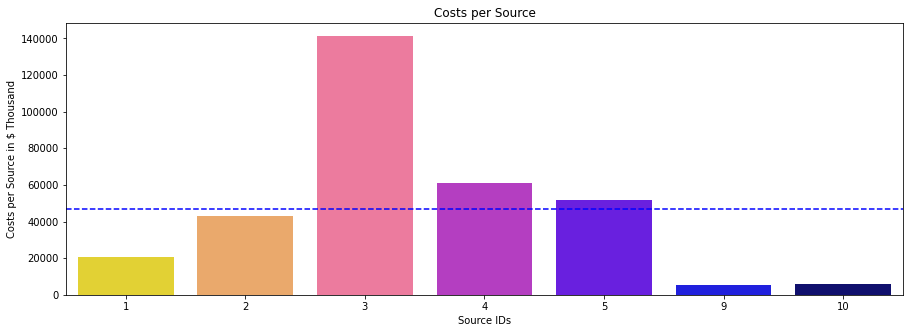

Total costs between June, 2017, and June, 2018: $329131.62. 

Average costs: 47018.80
Per day: $904.21.


In [55]:
costs_pivot = costs.groupby(['source_id']).agg({'costs': 'sum'}).reset_index()
f, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x='source_id',y="costs", palette=sns.color_palette('gnuplot2_r', 7), data=costs_pivot)
plt.title("Costs per Source")
plt.xlabel("Source IDs")
plt.ylabel("Costs per Source in $ Thousand")
plt.axhline( y=costs_pivot['costs'].mean(), ls='--',color="blue")
plt.show()

print("""Total costs between June, 2017, and June, 2018: ${}. 

Average costs: {:.2f}
Per day: ${:.2f}.""".format(costs['costs'].sum(),costs_pivot['costs'].mean(), costs['costs'].sum()/costs['dt'].nunique()))

<span style="color:orange">**Conlcusions:** </span> 

- Sources 3, 4 & 5 have the highest costs, over the average
- Sources 1, 9, & 10 are below average

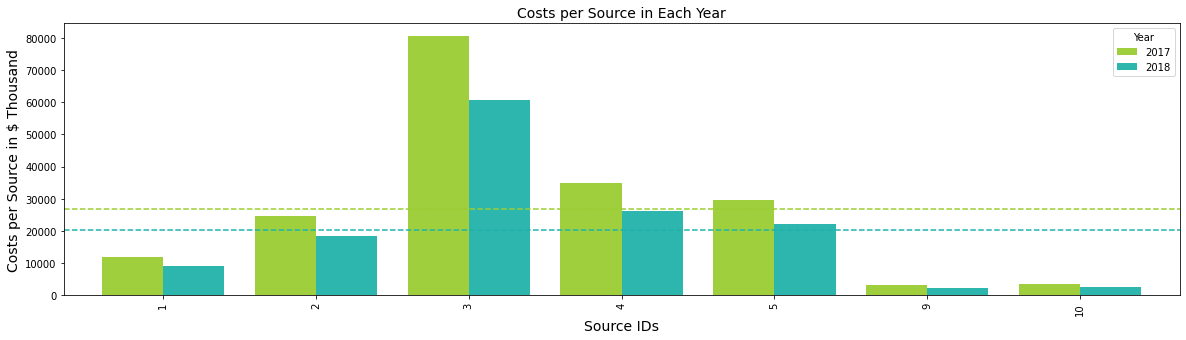

In [56]:
year = costs.pivot_table(index='source_id', columns=['dt_year'], values = 'costs',aggfunc=('sum'))
year.plot(figsize=(20,5),alpha=0.95, align='center', width = 0.8,kind='bar', color = ("yellowgreen", "lightseagreen"))
plt.title("Costs per Source in Each Year",size=14)
plt.xlabel("Source IDs",size=14)
plt.ylabel("Costs per Source in $ Thousand",size=14)
plt.legend(['2017','2018'], loc='best', title="Year")
plt.axhline( y=year['2017-01-01'].mean(), ls='--',color="yellowgreen")
plt.axhline( y=year['2018-01-01'].mean(), ls='--',color="lightseagreen")
plt.show()

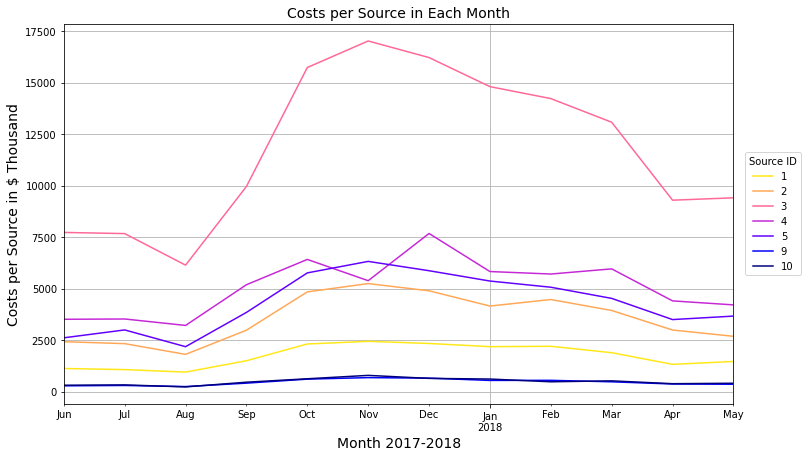

Average Monthly Cost per source: 
source_id
1      1736.105833
2      3567.170000
3     11776.802500
4      5089.466667
5      4313.091667
9       459.790833
10      485.207500
dtype: float64


In [57]:
#cost per source per month 

costs.pivot_table(index='dt_month', columns=['source_id'], values = 'costs',aggfunc=('sum')).plot(grid = True, figsize = (12, 7), color = sns.color_palette('gnuplot2_r', 7))
plt.title("Costs per Source in Each Month",size=14)
plt.xlabel("Month 2017-2018",size=14)
plt.ylabel("Costs per Source in $ Thousand",size=14)
plt.legend(loc='center left',bbox_to_anchor=(1.01, 0.5), title="Source ID")
plt.show()

month = costs.pivot_table(index='dt_month', columns=['source_id'], values = 'costs',aggfunc=('sum'))

print("""Average Monthly Cost per source: 
{}""".format(month.mean()))

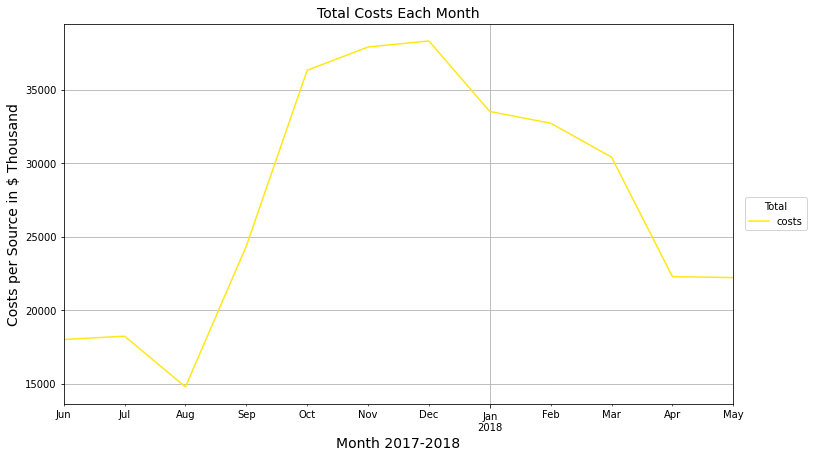

Overall marketing cost is 329131.62


In [58]:
#total cost

costs.pivot_table(index='dt_month', values = 'costs',aggfunc=('sum')).plot(grid = True, figsize = (12, 7), color = sns.color_palette('gnuplot2_r', 7))
plt.title("Total Costs Each Month",size=14)
plt.xlabel("Month 2017-2018",size=14)
plt.ylabel("Costs per Source in $ Thousand",size=14)
plt.legend(loc='center left',bbox_to_anchor=(1.01, 0.5), title="Total")
plt.show()

month = costs.pivot_table(index='dt_month', values = 'costs',aggfunc=('sum'))

print('Overall marketing cost is {}'.format(costs.costs.sum()))

<span style="color:orange">**Conlcusions:** </span> 

- Most expensive sources were the most expensive both in 2017 and 2018, 
- 2017 was more expensive for all source than 2018. 
- The costs from sources 3, 4 and 5 were above average in each year.


#### How much did customer acquisition from each of the sources cost? 

Checked source id's in the `costs` and `visits` table. We can see sources 6 and 7 generated visits but no costs:

In [59]:
print("""Costs table source_id:""", costs['source_id'].unique())
print()
print("""Visits table source_id:""",visits['source_id'].unique())

Costs table source_id: [ 1  2  3  4  5  9 10]

Visits table source_id: [ 4  2  5  9  3  1 10  7  6]


In [60]:
source_1 = visits.sort_values('day').groupby('uid').first()['source_id'].reset_index()
source_1.columns=['uid','first_source']
source_1.head()

,uid,first_source
0,11863502262781,3
1,49537067089222,2
2,297729379853735,3
3,313578113262317,2
4,325320750514679,5


In [61]:
orders = orders.merge(source_1,on='uid',how='left')
orders.head()

,buy_ts,revenue,uid,order_year,order_month,order_week,order_date,first_order,first_order_month,cohort_lifetime,first_source
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-01-01,2017-06-01,2017-06-01,2017-06-01,2017-06-01 00:10:00,2017-06-01,0,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-01-01,2017-06-01,2017-06-01,2017-06-01,2017-06-01 00:25:00,2017-06-01,0,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-01-01,2017-06-01,2017-06-01,2017-06-01,2017-06-01 00:27:00,2017-06-01,0,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-01-01,2017-06-01,2017-06-01,2017-06-01,2017-06-01 00:29:00,2017-06-01,0,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-01-01,2017-06-01,2017-06-01,2017-06-01,2017-06-01 07:58:00,2017-06-01,0,3


In [62]:
#costs per source and month
monthly_costs = costs.pivot_table(index=['dt_month', 'source_id'],values='costs', aggfunc='sum').reset_index().rename(columns={'dt_month': "month"})
monthly_costs.head()

,month,source_id,costs
0,2017-06-01,1,1125.61
1,2017-06-01,2,2427.38
2,2017-06-01,3,7731.65
3,2017-06-01,4,3514.80
4,2017-06-01,5,2616.12


In [63]:
#orders per month and source
monthly_orders = orders.groupby(['first_order_month','first_source'])['uid'].nunique().reset_index()
monthly_orders.columns=[ 'month','source_id','n_buyers']
monthly_orders.head()

,month,source_id,n_buyers
0,2017-06-01,1,218
1,2017-06-01,2,236
2,2017-06-01,3,618
3,2017-06-01,4,401
4,2017-06-01,5,390


In [64]:
# Merging tables and calculating CAC

month_source_cac = monthly_costs.merge(monthly_orders, on=['month', 'source_id'], how='left').fillna(0)
month_source_cac['cac'] = month_source_cac['costs'] / month_source_cac['n_buyers']
month_source_cac.head()

,month,source_id,costs,n_buyers,cac
0,2017-06-01,1,1125.61,218,5.163349
1,2017-06-01,2,2427.38,236,10.285508
2,2017-06-01,3,7731.65,618,12.510761
3,2017-06-01,4,3514.80,401,8.765087
4,2017-06-01,5,2616.12,390,6.708000


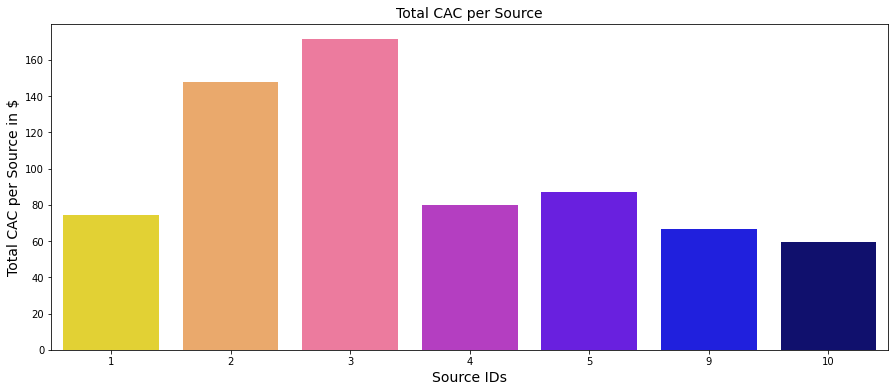

In [65]:
cac_pivot = month_source_cac.groupby(['source_id']).agg({'cac': 'sum'}).reset_index()
f, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x='source_id',y="cac", palette=sns.color_palette('gnuplot2_r', 7), data=cac_pivot)
plt.title("Total CAC per Source",size=14)
plt.xlabel("Source IDs",size=14)
plt.ylabel("Total CAC per Source in $",size=14)
plt.show()

<span style="color:orange">**Conlcusions:** </span> 

- When looking at the CAC by source, we see that souces 2 & 3 are the most expensive, while 9 & 10 the least

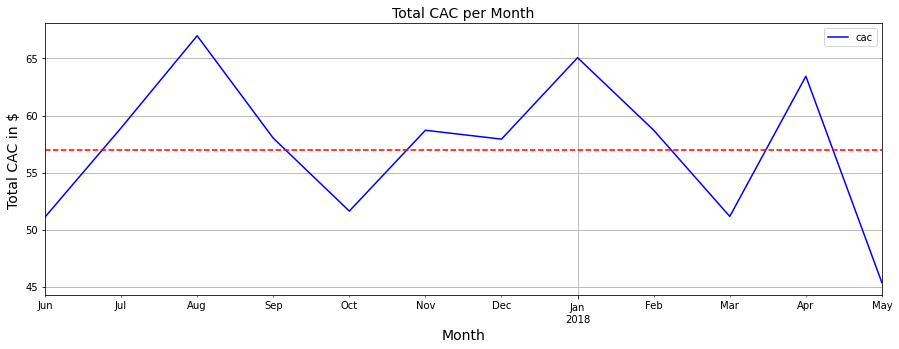

In [66]:
month_source_cac.groupby(['month']).agg({'cac': 'sum'}).plot(grid = True, figsize = (15, 5), color = 'blue')
plt.title("Total CAC per Month",size=14)
plt.xlabel("Month",size=14)
plt.ylabel("Total CAC in $",size=14)
plt.axhline( y=int((month_source_cac.groupby(['month']).agg({'cac': 'sum'})).mean()), ls='--',color="red")
plt.show()

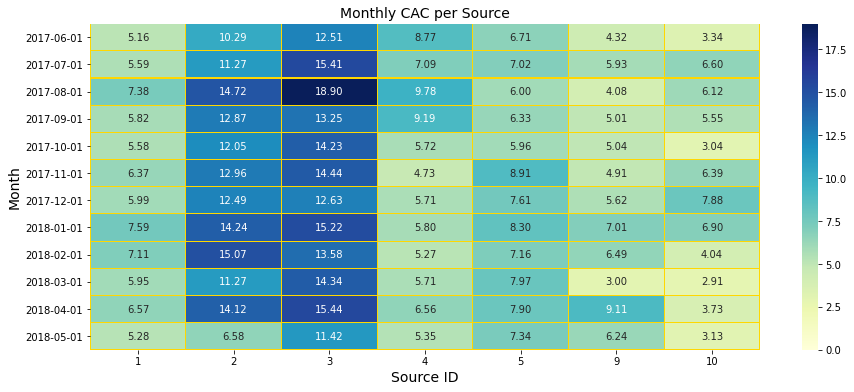

In [67]:
#bCAC per source
cac_per_source = month_source_cac.pivot_table(index = ['month'], columns = 'source_id', values = 'cac', aggfunc = 'sum')
cac_per_source.index = cac_per_source.index.astype(str)

plt.figure(figsize=(15, 6))
plt.title('Monthly CAC per Source', size=14)
sns.heatmap(cac_per_source,annot=True,fmt='.2f',linewidths=.1,linecolor='gold',cmap="YlGnBu", vmin=0, vmax=19)
plt.xlabel("Source ID", size=14) 
plt.ylabel("Month", size=14) 
plt.show()


<span style="color:orange">**Conlcusions:** </span> 

- When we focus on the CAC by month, August, January & April have the highest
- October & March, the lowest 
- Also, reminder that June-August & April were the months with less amount of users

- Checking the CAC per source and month, sources 2 and 3 have the highest CAC. Source 10 the lowest, along with source 9. 


##### ROI per cohort

In [68]:
#new table with CAC per month ROI
cac_per_month_roi = month_source_cac[['month','cac']]
cac_per_month_roi.columns = ['first_order_month','cac']


In [69]:
ROI = cohort_ltv.merge(cac_per_month_roi,on=['first_order_month'], how='left')
ROI['roi']=ROI['ltv']/ROI['cac']
ROI.head()

,first_order_month,order_month,revenue,n_buyers,cohort_lifetime,ltv,cac,roi
0,2017-06-01,2017-06-01,9557.49,2023,0,4.724414,5.163349,0.914990
1,2017-06-01,2017-06-01,9557.49,2023,0,4.724414,10.285508,0.459327
2,2017-06-01,2017-06-01,9557.49,2023,0,4.724414,12.510761,0.377628
3,2017-06-01,2017-06-01,9557.49,2023,0,4.724414,8.765087,0.539004
4,2017-06-01,2017-06-01,9557.49,2023,0,4.724414,6.708000,0.704296


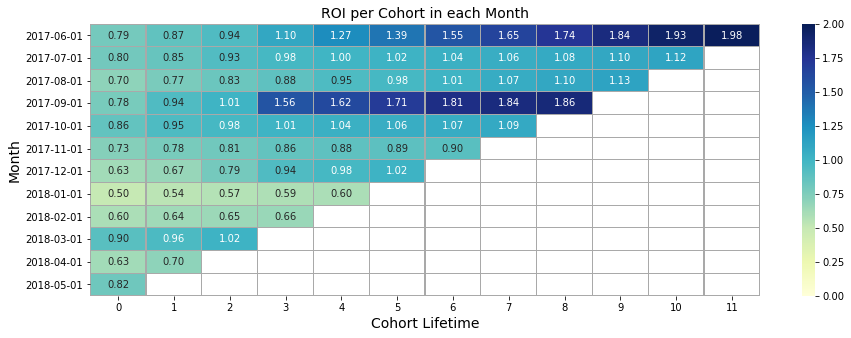

In [70]:
roi_piv = ROI.pivot_table(
    index='first_order_month' , columns='cohort_lifetime', values='roi', aggfunc='mean'
).cumsum(axis=1).round(2) 

roi_piv.index=roi_piv.index.astype(str)
plt.figure(figsize=(15, 5))
plt.title('ROI per Cohort in each Month', size=14)
sns.heatmap(roi_piv,annot=True,fmt='.2f',linewidths=.1,linecolor='darkgray',cmap="YlGnBu", vmin=0, vmax=2)
plt.xlabel("Cohort Lifetime", size=14) 
plt.ylabel("Month", size=14) 
plt.show()

<span style="color:orange">**Conlcusions:** </span> 

- Sept '17 & March '18 show ROI by the second lifetime
- Sept '17 cohort started to have ROI on the third lifetime
- The November 2017, January 2018, February 2018 and April 2018 had no ROI.



In [71]:
month_source_cac.head()

,month,source_id,costs,n_buyers,cac
0,2017-06-01,1,1125.61,218,5.163349
1,2017-06-01,2,2427.38,236,10.285508
2,2017-06-01,3,7731.65,618,12.510761
3,2017-06-01,4,3514.80,401,8.765087
4,2017-06-01,5,2616.12,390,6.708000


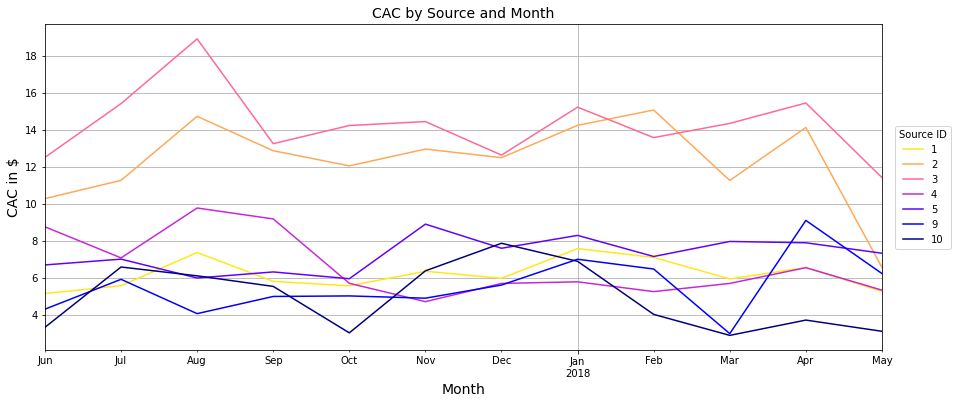

In [72]:
# Calculate CAC
month_source_cac['cac'] = month_source_cac['costs'] / month_source_cac['n_buyers']

# Create pivot table and plot a graph
source_month_cac = month_source_cac.pivot_table(values='cac', index='month', columns='source_id', aggfunc='mean')
source_month_cac.plot(grid = True, figsize = (15, 6), color = sns.color_palette('gnuplot2_r', 7))
plt.title("CAC by Source and Month", size=14)
plt.xlabel("Month", size=14)
plt.ylabel("CAC in $", size=14)
plt.legend(loc='center left',bbox_to_anchor=(1.01, 0.5), title="Source ID")
plt.show()


##### ROI Per source

In [73]:
#LTV by source

ltv_per_source=orders.groupby(['first_source'])['uid','revenue'].agg({'uid':'nunique','revenue':'sum'}).reset_index()
ltv_per_source.columns=['source_id', 'n_buyers','revenue']
ltv_per_source['ltv']=ltv_per_source['revenue']/ltv_per_source['n_buyers']

#ROI by source
roi_per_source=costs_pivot.merge(ltv_per_source,on=['source_id'])
roi_per_source['cac']=roi_per_source['costs']/roi_per_source['n_buyers']
roi_per_source['roi']=roi_per_source['ltv']/roi_per_source['cac']
roi_per_source

,source_id,costs,n_buyers,revenue,ltv,cac,roi
0,1,20833.27,3383,35529.84,10.502465,6.158223,1.705438
1,2,42806.04,3557,45721.66,12.853995,12.034310,1.068112
2,3,141321.63,10121,51183.42,5.057150,13.963208,0.362177
3,4,61073.60,9996,55009.80,5.503181,6.109804,0.900713
4,5,51757.10,7104,54478.15,7.668659,7.285628,1.052573
5,9,5517.49,1060,5536.96,5.223547,5.205179,1.003529
6,10,5822.49,1301,4596.15,3.532782,4.475396,0.789379


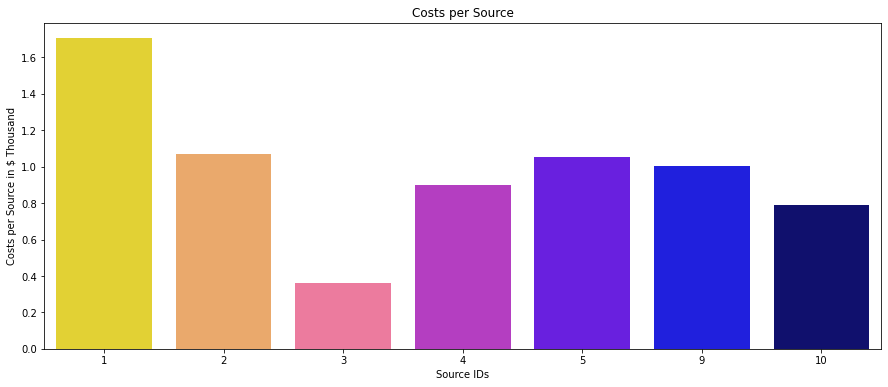

In [74]:
f, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x='source_id',y="roi", palette=sns.color_palette('gnuplot2_r', 7), data=roi_per_source)
plt.title("Costs per Source")
plt.xlabel("Source IDs")
plt.ylabel("Costs per Source in $ Thousand")
plt.show()

<span style="color:orange">**Conlcusions:** </span> 

- Source 1 had the highests ROI and Source 3 the lowest

<span style="color:green">**Steps taken:** </span> 

* Create new orders table with selected columns & grouping them by month, cohort lifetime and first source. Extra column to get the total unique buyers along with the total revenue. Same procedure with costs table

* `cohort` table with the first order of the month, cohort lifetime and number of buyers. Taking from table `ltv_cohorts` merge with `orders_new` and getting the LTV

* Calculating ROI & CAC by source

In [75]:
orders_new = orders[['uid', 'revenue', 'first_order_month', 'cohort_lifetime', 'first_source']]
orders_new = orders_new.groupby(['cohort_lifetime', 'first_source', 'first_order_month']).agg({'uid':'nunique', 'revenue':'sum'}).reset_index()
costs_new = costs[['source_id', 'dt_month', 'costs']]
costs_new = costs_new.groupby(['source_id', 'dt_month']).agg({'costs':'sum'}).reset_index()

In [76]:
cohort = cohort_ltv[['first_order_month', 'cohort_lifetime', 'n_buyers']]
ltv_cohorts = orders_new.merge(cohort, on=['first_order_month', 'cohort_lifetime'], how='left')
ltv_cohorts['ltv'] = ltv_cohorts['revenue']/ltv_cohorts['n_buyers']

In [77]:
costs_new = costs_new.rename(columns={'dt_month': "first_order_month"})
ltv_cohorts = ltv_cohorts.rename(columns={'first_source': "source_id"})
roi_cohorts = costs_new.merge(ltv_cohorts, on=['first_order_month', 'source_id'], how='left')

In [78]:
roi_cohorts['cac'] = roi_cohorts['costs']/roi_cohorts['n_buyers']
roi_cohorts['roi'] = roi_cohorts['ltv']/roi_cohorts['cac']
roi_cohorts.head()

,source_id,first_order_month,costs,cohort_lifetime,uid,revenue,n_buyers,ltv,cac,roi
0,1,2017-06-01,1125.61,0,218,1476.75,2023,0.729980,0.556406,1.311955
1,1,2017-06-01,1125.61,1,17,313.28,2023,0.154859,0.556406,0.278320
2,1,2017-06-01,1125.61,2,11,397.13,2023,0.196307,0.556406,0.352813
3,1,2017-06-01,1125.61,3,11,682.56,2023,0.337400,0.556406,0.606391
4,1,2017-06-01,1125.61,4,15,434.95,2023,0.215002,0.556406,0.386413


In [79]:
#function to use with the each source
def roi_source(x, y):
    so_roi = roi_cohorts.query(x).pivot_table(
        index='first_order_month' , columns='cohort_lifetime', values='roi', aggfunc='mean'
    ).cumsum(axis=1).round(2)
    so_roi.index = so_roi.index.astype(str)
    plt.figure(figsize=(20, 6))
    sns.heatmap(so_roi ,annot=True,fmt='.2f',linewidths=.1,linecolor='gray',cmap="PuRd", vmin=0.2, vmax=4)
    plt.title("ROI for Source {} per Cohort".format(y))
    plt.xlabel("Cohort Lifetime", size=14) 
    plt.ylabel("Cohorts", size=14) 
    plt.show()

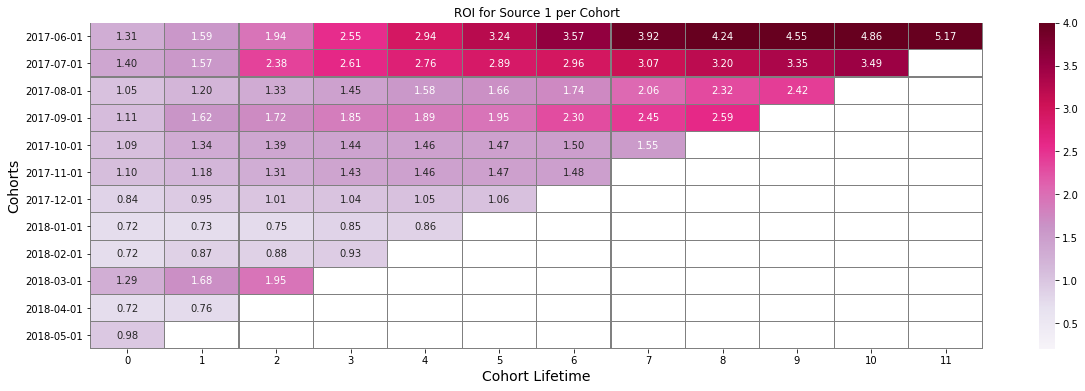

In [80]:
roi_source(x='source_id == 1', y=1)

<span style="color:green">**Notes:** </span> 

* Source 1: Fast ROI for many of the cohorts, exception Dec '17, Jannuary, February, April & May 2018


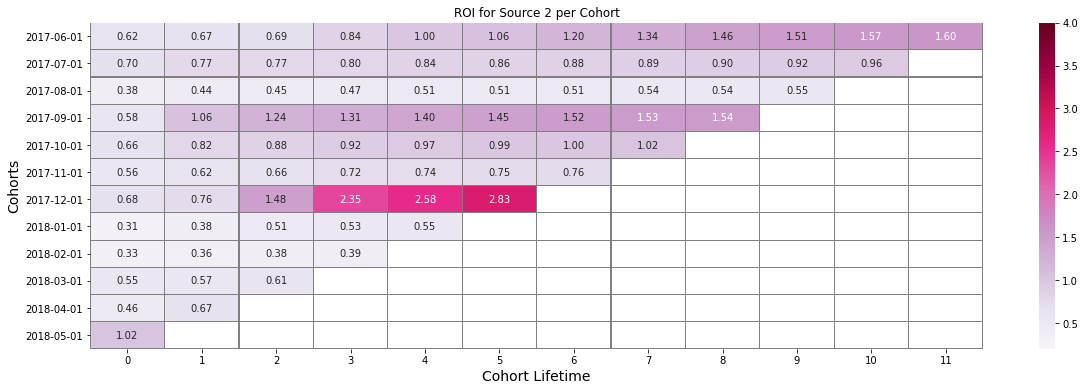

In [81]:
roi_source(x='source_id == 2', y=2)

<span style="color:green">**Notes:** </span> 

* Source 2: June '17 took 6 months to see ROI, while September '17 took only 1 and December '17 took 2. June 2017, September 2017 and December 2017 cohorts were the most profitable

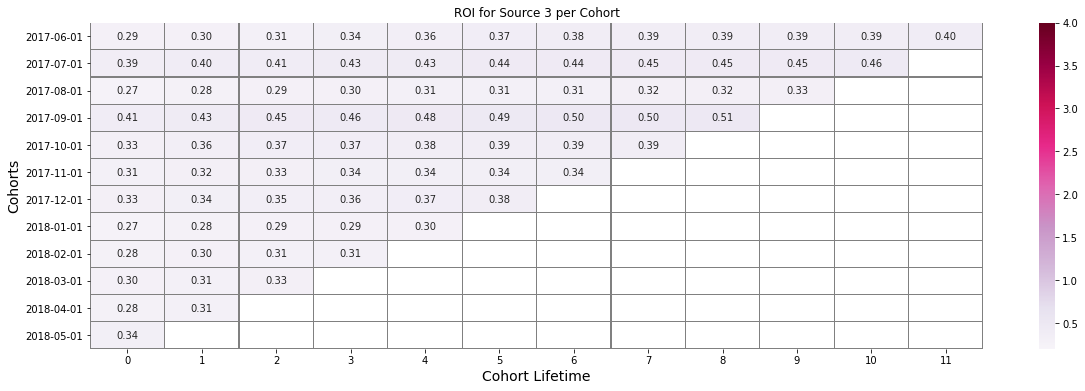

In [82]:
roi_source(x='source_id == 3', y=3)

<span style="color:green">**Notes:** </span> 

* Source 3: No ROI for any cohort in this source, as it was the most expensive and highest CAC.

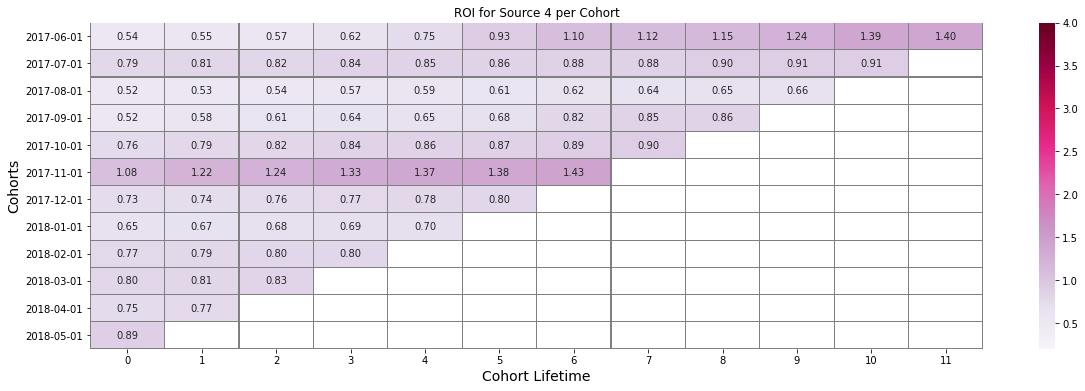

In [83]:
roi_source(x='source_id == 4', y=4)

<span style="color:green">**Notes:** </span> 

* Source 4: ROI only on June and November '17


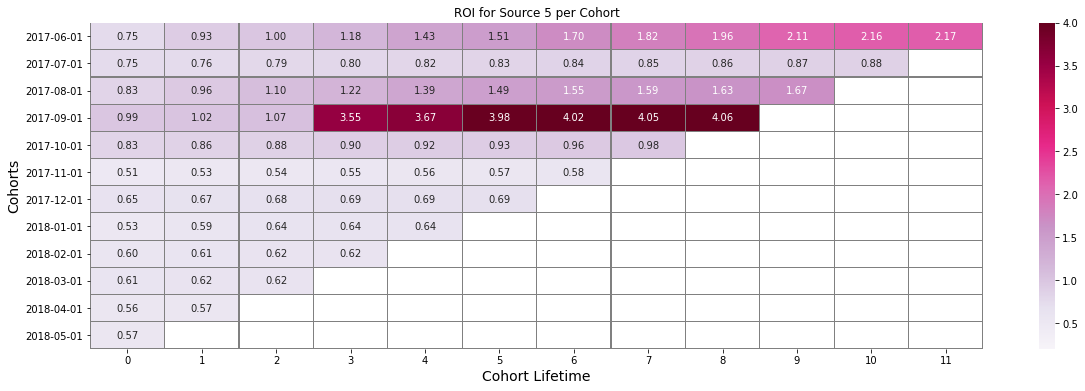

In [84]:
roi_source(x='source_id == 5', y=5)

<span style="color:green">**Notes:** </span> 

* Source 5: very big differences bewteen cohorts. June & August '17, had hight ROI & September the highest. The rest had no ROI

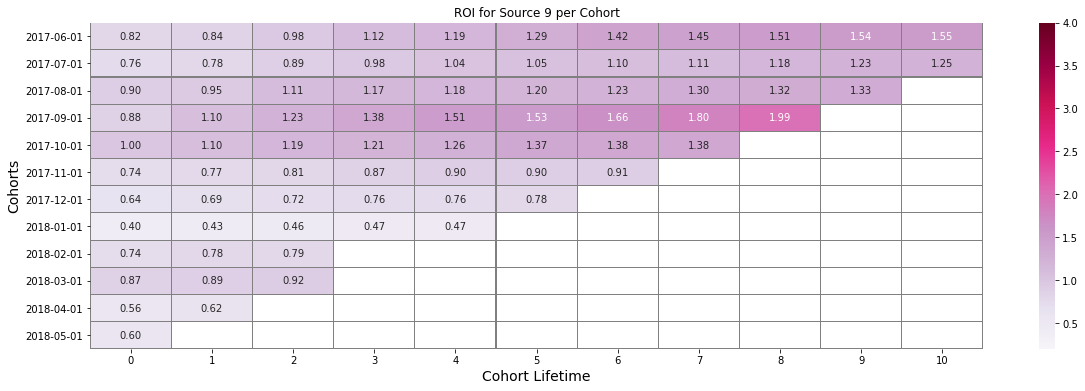

In [85]:
roi_source(x='source_id == 9', y=9)

<span style="color:green">**Notes:** </span> 

* Source 9: Cohorts with ROI June to Oct '17.
* For July 17, took 7 months to be profitable. June 3months, Augusts 2months, Septemeber 1 month, October first month.


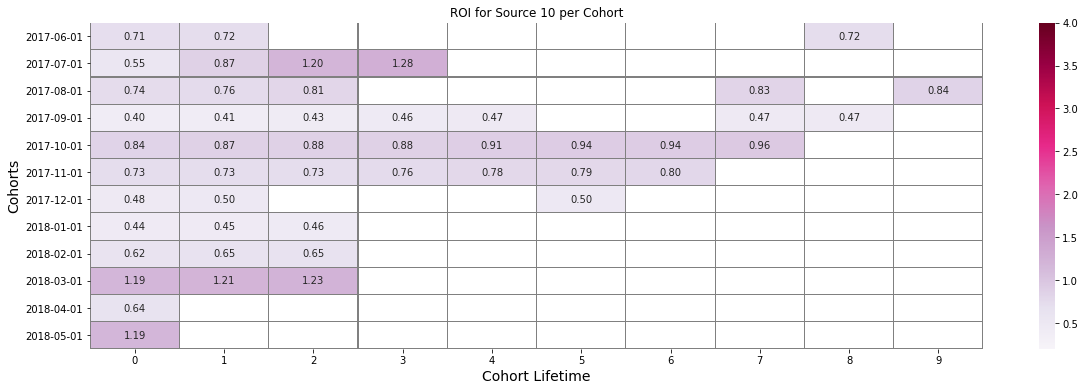

In [86]:
roi_source(x='source_id == 10', y=10)

<span style="color:green">**Notes:** </span> 

* Source 10: Profitable only for some cohorts only and with many jumps and some no ROI at all.

---

## Conclusion and Recommendations

We worked with 3 separated sources of data in 3 tables: `visits`, `orders` and `costs`

**DATA PREPROCESSING:**

* Changed datatypes & convert to lowercase column names to match
* Checked for duplicated values


**REPORTS & METRICS:**

* PRODUCT
    * Checked daily, weekly and monthly active users
    * Checked the duration of the visits
    * Checked the retention rate & how often users come back 


* SALES: 
    * When people start buying
    * Orders done by period time
    * Size of those orders
    * LTV generated
    
    
* MARKETING
    * Sources & money spent
    * Aquisition per source cost
    * ROI per cohort and source

--- 

Conclusions:

1. Desktop platform brings more visits and more revenue, and we think it might be related to touch devices not being very accessible to the product, so users prefer desktop. 
    * The usage of desktop drops on weekends, so we can think people look at the product also during their working time, when they have more and continuos access to the product
     

2. Sources:
    * Source 3 is the most expensive and brings the least, as customer aquisition is aroun 165 and the ROI is roughly 0.4
    * Source 1 has the highest ROI
    * When looking at the CAC by source, we see that souces 2 & 3 are the most expensive, while 9 & 10 the least


3. Visits & conversion:
    * Total visits: 228169
    * Orders placed by those visits: 36523 
    * Conversion rate is 16.01%. 
    * From 30,087 orders, 82.38%, were placed in the users' first visit.
    * The average time it takes a user to become a customer is 16.6 days.


4. Retention
    * Retention rate from summer to the Holiday season is higher (specially for the first cohort: June '17) than the first two Q of the year.
    * Retention rate after the holidays (beginning in January 2018), is low.


* LTV is higher in the first month
* LTV declined on cohort June '17
* September 2017 cohort's LTV was high on the second month in October. Then dropped and then went up again in December (when we see the highest average purchase size per user). They brought the highest revenue on average

---

**Recommendations**

- Improve touch devices experience to convert more users on ongoing basis, as touch devices are more accessible to people all the time than desktop, also will be less affected by seasoning
- Investing in sources 1 and 9 as they brought good ROI, mostly 1. Source 9 is the most consitent across the board
- Source 3 is the most expensive with very low ROI generated, better focus efforts on other sources

